# Imports

In [1]:
# imports
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.decomposition import PCA
from datetime import date

# 1 Getting the data

In [2]:
data_frame=pd.DataFrame(pd.read_csv("./Marketing_Campaign_Test.csv", index_col=0))

# set the max columns to none
pd.set_option('display.max_columns', None)
print("shape: ", data_frame.shape)
data_frame.head()

shape:  (560, 27)


,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,Mnt_Meat,Mnt_sweet,Mnt_Wines,Mnt_Gold_Products,Mnt_Fish,Num_Web_Purchases,Num_Store_Purchases,Num_Deals_Purchases,Num_Catalog_Purchases,Num_Web_Visits,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Cost_Contact,Revenue
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,
5430,1956.0,Graduation,Together,54450.0,1.0,1.0,14/09/2012,0,454.0,0.0,171.0,8.0,19.0,32.0,12.0,9.0,2.0,8.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0
8996,1957.0,PhD,Married,NaN,2.0,1.0,19/11/2012,4,230.0,42.0,192.0,49.0,37.0,53.0,12.0,7.0,2.0,8.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0
8432,1956.0,Graduation,Together,NaN,1.0,1.0,14/09/2012,0,454.0,0.0,171.0,8.0,19.0,32.0,12.0,9.0,2.0,8.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0
6566,1954.0,PhD,NaN,72550.0,1.0,1.0,08/11/2012,39,826.0,50.0,317.0,50.0,38.0,38.0,9.0,5.0,2.0,12.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0
2552,1955.0,PhD,Single,55521.0,1.0,2.0,22/10/2013,11,416.0,0.0,26.0,0.0,0.0,4.0,9.0,6.0,3.0,6.0,14.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,11.0


# 2. Pre-procces
#### On that section we are using Part 1 pre-proccesing methods + some addition in regards to the comments we were given

## 2.1 Train data

### Education

In [3]:
data_frame[data_frame['Education'].isnull()]

,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,Mnt_Meat,Mnt_sweet,Mnt_Wines,Mnt_Gold_Products,Mnt_Fish,Num_Web_Purchases,Num_Store_Purchases,Num_Deals_Purchases,Num_Catalog_Purchases,Num_Web_Visits,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Cost_Contact,Revenue
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,
10905,NaN,NaN,NaN,NaN,NaN,NaN,29/10/2012,7,194.0,2.0,56.0,0.0,0.0,0.0,5.0,4.0,1.0,6.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0
3536,NaN,NaN,NaN,NaN,NaN,NaN,24/03/2013,65,7.0,11.0,3.0,10.0,4.0,20.0,2.0,1.0,1.0,3.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0
10164,NaN,NaN,NaN,NaN,NaN,NaN,03/04/2014,75,1017.0,33.0,417.0,108.0,100.0,16.0,1.0,5.0,5.0,5.0,10.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,11.0
2326,NaN,NaN,NaN,NaN,NaN,NaN,16/02/2013,15,32.0,0.0,8.0,23.0,4.0,18.0,1.0,1.0,0.0,4.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0


#### On these missing values we notice no usefull information regarding the person so we delete it

In [4]:
data_frame.drop(data_frame.index[data_frame['Education'].isnull()], inplace = True)

#### Now transforming Education into numeric value 

In [5]:
# Changing Education to numeric values
data_frame['Education_num'] = 0
data_frame.loc[data_frame['Education'] == 'Basic', 'Education_num'] = 1
data_frame.loc[data_frame['Education'] == 'Graduation', 'Education_num'] = 2
data_frame.loc[data_frame['Education'] == 'Master', 'Education_num'] = 3
data_frame.loc[data_frame['Education'] == '2n Cycle', 'Education_num'] = 4
data_frame.loc[data_frame['Education'] == 'PhD', 'Education_num'] = 5

### Status

In [6]:
data_frame[data_frame['Status'].isnull()]

,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,Mnt_Meat,Mnt_sweet,Mnt_Wines,Mnt_Gold_Products,Mnt_Fish,Num_Web_Purchases,Num_Store_Purchases,Num_Deals_Purchases,Num_Catalog_Purchases,Num_Web_Visits,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Cost_Contact,Revenue,Education_num
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6566,1954.0,PhD,NaN,72550.0,1.0,1.0,08/11/2012,39,826.0,50.0,317.0,50.0,38.0,38.0,9.0,5.0,2.0,12.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,5
2404,1976.0,Graduation,NaN,53359.0,1.0,1.0,27/05/2013,4,173.0,4.0,30.0,3.0,6.0,41.0,4.0,5.0,1.0,4.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,2
7300,1952.0,Graduation,NaN,69142.0,0.0,1.0,29/06/2014,50,448.0,4.0,34.0,6.0,4.0,39.0,3.0,8.0,1.0,7.0,10.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,11.0,2
9909,1996.0,2n Cycle,NaN,7500.0,0.0,0.0,09/11/2012,24,3.0,18.0,14.0,15.0,22.0,50.0,3.0,3.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,4
4939,1946.0,Graduation,NaN,37760.0,0.0,0.0,31/08/2012,20,84.0,5.0,38.0,150.0,12.0,28.0,2.0,4.0,1.0,6.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,2
503,1985.0,Master,NaN,20559.0,1.0,0.0,12/03/2013,88,13.0,1.0,29.0,3.0,0.0,7.0,2.0,2.0,0.0,3.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,3
11100,1972.0,Graduation,NaN,51813.0,1.0,1.0,11/04/2013,37,51.0,2.0,7.0,0.0,1.0,2.0,2.0,2.0,0.0,3.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,2
9422,1989.0,Graduation,NaN,38360.0,1.0,0.0,31/05/2013,26,36.0,2.0,42.0,20.0,21.0,10.0,2.0,2.0,1.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,2
8601,1980.0,Graduation,NaN,80011.0,0.0,1.0,29/04/2013,3,421.0,76.0,536.0,82.0,178.0,102.0,2.0,8.0,6.0,5.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,2


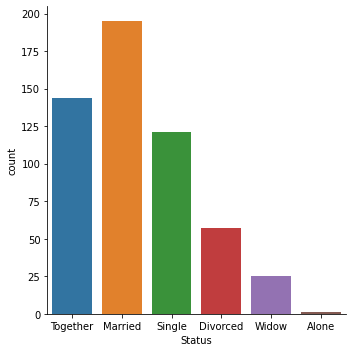

In [7]:
sns.catplot(x = 'Status', kind = 'count', data = data_frame)

In [8]:
# Changing Status column to numeric values
data_frame['Status_num'] = 4
data_frame.loc[data_frame['Status'] == 'Alone', 'Status_num'] = 1
data_frame.loc[data_frame['Status'] == 'Single', 'Status_num'] = 2
data_frame.loc[data_frame['Status'] == 'Divorced', 'Status_num'] = 3
data_frame.loc[data_frame['Status'] == 'Married', 'Status_num'] = 4
data_frame.loc[data_frame['Status'] == 'Together', 'Status_num'] = 5
data_frame.loc[data_frame['Status'] == 'Widow', 'Status_num'] = 6

#### Searching for high correlation between the data with status

In [9]:
column_1 = data_frame['Status_num']
column_2= data_frame['Education_num']
correlation = column_1.corr(column_2)
print(f"The correlation between Status_num and Education_num is:{correlation}")
column_1 = data_frame['Status_num']
column_2= data_frame['Year_Birth']
correlation = column_1.corr(column_2)
print(f"The correlation between Status_num and Year_Birth is:{correlation}")
column_1 = data_frame['Status_num']
column_2= data_frame['Income']
correlation = column_1.corr(column_2)
print(f"The correlation between Status_num and Income is:{correlation}")

The correlation between Status_num and Education_num is:0.004769419241503123
The correlation between Status_num and Year_Birth is:-0.15063674058662985
The correlation between Status_num and Income is:0.07631607770653635


#### There is no high correlation with any of the other data so we will leave the default behavior which is NaN values are assigned to the max - Married

### Year_birth

In [10]:
data_frame[data_frame['Year_Birth'].isnull()]

,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,Mnt_Meat,Mnt_sweet,Mnt_Wines,Mnt_Gold_Products,Mnt_Fish,Num_Web_Purchases,Num_Store_Purchases,Num_Deals_Purchases,Num_Catalog_Purchases,Num_Web_Visits,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Cost_Contact,Revenue,Education_num,Status_num
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1377,NaN,Master,Widow,44551.0,0.0,1.0,31/08/2013,24,182.0,4.0,33.0,0.0,0.0,66.0,2.0,4.0,1.0,5.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,3,6
7232,NaN,Graduation,Widow,42429.0,0.0,1.0,11/02/2014,99,55.0,0.0,6.0,2.0,0.0,4.0,2.0,1.0,1.0,3.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,2,6
7094,NaN,Graduation,Widow,58330.0,0.0,1.0,25/12/2013,87,445.0,53.0,213.0,104.0,98.0,151.0,1.0,6.0,4.0,13.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,2,6
313,NaN,Graduation,Widow,73455.0,0.0,0.0,28/10/2013,98,901.0,61.0,757.0,186.0,163.0,20.0,1.0,6.0,5.0,10.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,11.0,2,6
10972,NaN,Graduation,Widow,72298.0,0.0,0.0,10/03/2014,52,625.0,35.0,169.0,58.0,17.0,35.0,1.0,4.0,3.0,6.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,11.0,2,6


In [11]:
column_1 = data_frame['Year_Birth']
column_2= data_frame['Num_of_kids']
correlation = column_1.corr(column_2)
print(correlation )

0.2355202311201227


#### We take the year of birth data , transform it to age data and fill in the missing value according to the median. We checked and we found that the higest corr is with num_of_kids which is still low (~0.22)

2022
              Age
count  551.000000
mean    53.635209
std     12.113379
min     26.000000
25%     45.000000
50%     52.000000
75%     63.000000
max    122.000000


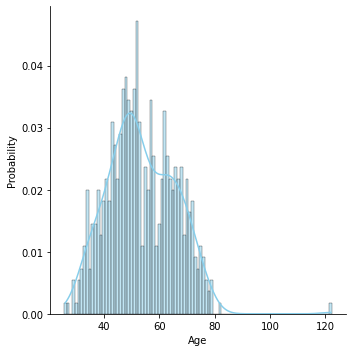

In [12]:
#we decided to add a "Age" column by subtraction "Year_Birth" from the current Year:
todays_date = date.today()
year=todays_date.year
print(year)
Age = []
for value in data_frame['Year_Birth']:
    Age.append(year-value)
data_frame["Age"] = Age
sns.displot(data_frame['Age'], kde=True, color='skyblue', stat="probability", discrete=True )
print (data_frame[["Age"]].describe())

#### Filling Age missing values by median 

In [13]:
# Convert year of birth value to Age
age_median = (data_frame['Age'].median())
print(f"The Age median is: {age_median}")
data_frame['Age'].fillna(age_median,inplace=True)

The Age median is: 52.0


#### Split the Age to catagorical with partition that can devide the area with high entries

Max Age 26.0
Min Age 122.0
width 14.0


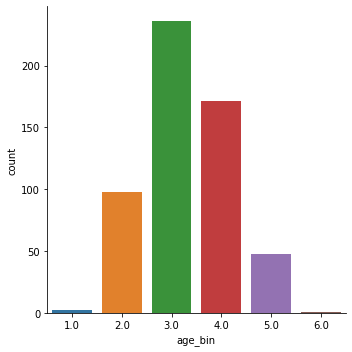

In [14]:
#equal-width partitioning
A = data_frame['Age'].min()
print(f"Max Age {A}")
B = data_frame['Age'].max()
print(f"Min Age {B}")
N = 7
W = np.round((B - A)/N)
print(f"width {W}")
data_frame.loc[ data_frame['Age'] <= W, 'age_bin'] = 0 
data_frame.loc[(data_frame['Age'] > W) & (data_frame['Age'] <= 2*W), 'age_bin'] = 1 
data_frame.loc[(data_frame['Age'] > 2*W) & (data_frame['Age'] <= 3*W), 'age_bin'] = 2 
data_frame.loc[(data_frame['Age'] > 3*W) & (data_frame['Age'] <= 4*W), 'age_bin'] = 3
data_frame.loc[(data_frame['Age'] > 4*W) & (data_frame['Age'] <= 5*W), 'age_bin'] = 4
data_frame.loc[(data_frame['Age'] > 5*W) & (data_frame['Age'] <= 6*W), 'age_bin'] = 5
data_frame.loc[ data_frame['Age'] > 6*W, 'age_bin'] = 6

data_frame['age_bin'].value_counts()
sns.catplot(x = 'age_bin', kind = 'count', data = data_frame)

### Num_Web_Purchases

In [15]:
column_1 = data_frame['Num_Web_Purchases']
column_2 = data_frame['Num_Web_Visits']
correlation = column_1.corr(column_2)
print(f"The correlation between Num_Web_Visits and Num_Web_Purchases is:{correlation}")
# We will fill in by median
webp_median = (data_frame['Num_Web_Purchases'].median())
print(f"The Num_Web_Purchases median is: {webp_median}")
data_frame['Num_Web_Purchases'].fillna(webp_median,inplace=True)

The correlation between Num_Web_Visits and Num_Web_Purchases is:0.37172926215296304
The Num_Web_Purchases median is: 2.0


#### There is low (<0.5) correlation and we decided to fill in by the median

### Cost contact

In [16]:
cost_median = (data_frame['Cost_Contact'].median())
print(f"The cost contact median is: {cost_median}")
data_frame['Cost_Contact'].fillna(cost_median,inplace=True)

The cost contact median is: 3.0


### Income

In [17]:
data_frame[data_frame['Income'].isnull()]

,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,Mnt_Meat,Mnt_sweet,Mnt_Wines,Mnt_Gold_Products,Mnt_Fish,Num_Web_Purchases,Num_Store_Purchases,Num_Deals_Purchases,Num_Catalog_Purchases,Num_Web_Visits,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Cost_Contact,Revenue,Education_num,Status_num,Age,age_bin
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8996,1957.0,PhD,Married,NaN,2.0,1.0,19/11/2012,4,230.0,42.0,192.0,49.0,37.0,53.0,12.0,7.0,2.0,8.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,5,4,65.0,4.0
8432,1956.0,Graduation,Together,NaN,1.0,1.0,14/09/2012,0,454.0,0.0,171.0,8.0,19.0,32.0,12.0,9.0,2.0,8.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,2,5,66.0,4.0
7187,1969.0,Master,Together,NaN,1.0,1.0,18/05/2013,52,375.0,42.0,48.0,94.0,66.0,96.0,7.0,4.0,10.0,4.0,6.0,NaN,0.0,0.0,0.0,0.0,0.0,3.0,11.0,3,5,53.0,3.0
8858,1972.0,PhD,Married,NaN,0.0,1.0,07/03/2013,69,516.0,0.0,21.0,0.0,0.0,5.0,4.0,8.0,2.0,7.0,16.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,11.0,5,4,50.0,3.0
1612,1981.0,PhD,Single,NaN,1.0,0.0,31/05/2013,82,23.0,0.0,15.0,0.0,2.0,7.0,2.0,3.0,0.0,3.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,5,2,41.0,2.0
9197,1953.0,Graduation,Married,NaN,0.0,1.0,24/02/2014,92,32.0,0.0,5.0,2.0,0.0,8.0,2.0,2.0,0.0,3.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,2,4,69.0,4.0
4345,1964.0,2n Cycle,Single,NaN,1.0,1.0,12/01/2014,49,5.0,1.0,9.0,2.0,0.0,4.0,1.0,1.0,0.0,2.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,4,2,58.0,4.0
11178,1972.0,Master,Single,NaN,1.0,0.0,23/03/2014,69,15.0,2.0,10.0,0.0,1.0,4.0,1.0,1.0,0.0,3.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,3,2,50.0,3.0
10304,1959.0,Graduation,Married,NaN,0.0,0.0,28/12/2012,77,6.0,1.0,7.0,23.0,4.0,19.0,1.0,1.0,1.0,2.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,2,4,63.0,4.0


#### Checking for correlations

In [18]:
features=list(['Income','Education_num', 'Status_num','age_bin',])
data_frame[features].corr()



,Income,Education_num,Status_num,age_bin
Income,1.000000,0.054478,0.076316,0.194430
Education_num,0.054478,1.000000,0.004769,0.068623
Status_num,0.076316,0.004769,1.000000,0.136828
age_bin,0.194430,0.068623,0.136828,1.000000


#### Filling Income by median

In [19]:
income_median = (data_frame['Income'].median())
print(f"The Income median is: {income_median}")
data_frame['Income'].fillna(income_median,inplace=True)


The Income median is: 53761.0


#### Norm

Min Income 4861.0
Max Income 157733.0
width 21839.0


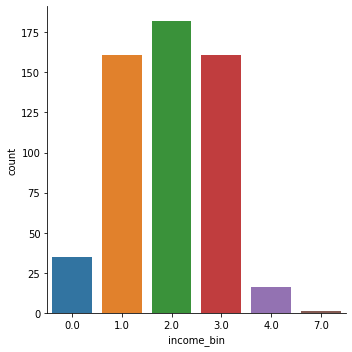

In [20]:
#equal-width partitioning
A = data_frame['Income'].min()
print(f"Min Income {A}")
B = data_frame['Income'].max()
print(f"Max Income {B}")
N = 7
W = np.round((B - A)/N)
print(f"width {W}")
data_frame.loc[ data_frame['Income'] <= W, 'income_bin'] = 0 
data_frame.loc[(data_frame['Income'] > W) & (data_frame['Income'] <= 2*W), 'income_bin'] = 1 
data_frame.loc[(data_frame['Income'] > 2*W) & (data_frame['Income'] <= 3*W), 'income_bin'] = 2 
data_frame.loc[(data_frame['Income'] > 3*W) & (data_frame['Income'] <= 4*W), 'income_bin'] = 3
data_frame.loc[(data_frame['Income'] > 4*W) & (data_frame['Income'] <= 5*W), 'income_bin'] = 4
data_frame.loc[(data_frame['Income'] > 5*W) & (data_frame['Income'] <= 6*W), 'income_bin'] = 5
data_frame.loc[(data_frame['Income'] > 6*W) & (data_frame['Income'] <= 7*W), 'income_bin'] = 6
data_frame.loc[(data_frame['Income'] > 7*W) & (data_frame['Income'] <= 8*W), 'income_bin'] = 7
data_frame.loc[ data_frame['Income'] > 8*W, 'income_bin'] = 8

data_frame['income_bin'].value_counts()
sns.catplot(x = 'income_bin', kind = 'count', data = data_frame)

In [21]:
#equal-width partitioning
A = data_frame['Income'].min()
print(f"Min Income {A}")
B = data_frame['Income'].max()
print(f"Max Income {B}")
N = 55
W = np.round((B - A)/N)
print(f"width {W}")
data_frame.loc[ data_frame['Income'] <= W, 'income_bin'] = 0 
data_frame.loc[(data_frame['Income'] > W) & (data_frame['Income'] <= 2*W), 'income_bin'] = 1 
data_frame.loc[(data_frame['Income'] > 2*W) & (data_frame['Income'] <= 3*W), 'income_bin'] = 2 
data_frame.loc[(data_frame['Income'] > 3*W) & (data_frame['Income'] <= 4*W), 'income_bin'] = 3
data_frame.loc[(data_frame['Income'] > 4*W) & (data_frame['Income'] <= 5*W), 'income_bin'] = 4
data_frame.loc[(data_frame['Income'] > 5*W) & (data_frame['Income'] <= 6*W), 'income_bin'] = 5
data_frame.loc[(data_frame['Income'] > 6*W) & (data_frame['Income'] <= 7*W), 'income_bin'] = 6
data_frame.loc[ data_frame['Income'] > 7*W, 'income_bin'] = 7

data_frame['income_bin'].value_counts()

Min Income 4861.0
Max Income 157733.0
width 2779.0


7.0    528
6.0     10
5.0      9
2.0      4
3.0      2
4.0      2
1.0      1
Name: income_bin, dtype: int64

### Mnt_X - excluding Nan and normilize

In [22]:
data_frame[data_frame['Mnt_Fruits'].isnull()]

,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,Mnt_Meat,Mnt_sweet,Mnt_Wines,Mnt_Gold_Products,Mnt_Fish,Num_Web_Purchases,Num_Store_Purchases,Num_Deals_Purchases,Num_Catalog_Purchases,Num_Web_Visits,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Cost_Contact,Revenue,Education_num,Status_num,Age,age_bin,income_bin
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7617,1974.0,Graduation,Single,42373.0,1.0,1.0,15/08/2013,83,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,2,2,48.0,3.0,7.0
4692,1976.0,Graduation,Married,7500.0,1.0,0.0,01/08/2012,19,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,2,4,46.0,3.0,2.0


In [23]:
# Remove rows as no products data and Responses to old campains
data_frame.drop(data_frame.index[data_frame['Mnt_Fruits'].isnull()], inplace = True)

In [24]:
data_frame[data_frame['Mnt_Meat'].isnull()]

,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,Mnt_Meat,Mnt_sweet,Mnt_Wines,Mnt_Gold_Products,Mnt_Fish,Num_Web_Purchases,Num_Store_Purchases,Num_Deals_Purchases,Num_Catalog_Purchases,Num_Web_Visits,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Cost_Contact,Revenue,Education_num,Status_num,Age,age_bin,income_bin
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [25]:
data_frame[data_frame['Mnt_sweet'].isnull()]

,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,Mnt_Meat,Mnt_sweet,Mnt_Wines,Mnt_Gold_Products,Mnt_Fish,Num_Web_Purchases,Num_Store_Purchases,Num_Deals_Purchases,Num_Catalog_Purchases,Num_Web_Visits,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Cost_Contact,Revenue,Education_num,Status_num,Age,age_bin,income_bin
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2849,1979.0,Graduation,Single,60474.0,0.0,1.0,01/04/2013,25,265.0,199.0,NaN,234.0,9.0,170.0,7.0,10.0,2.0,12.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,2,2,43.0,3.0,7.0
1378,1972.0,2n Cycle,Together,50334.0,0.0,1.0,24/07/2013,24,284.0,16.0,NaN,84.0,16.0,134.0,6.0,7.0,4.0,6.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,4,5,50.0,3.0,7.0
5287,1973.0,Graduation,Married,34961.0,1.0,0.0,19/06/2014,77,45.0,2.0,NaN,4.0,1.0,1.0,3.0,3.0,1.0,3.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,2,4,49.0,3.0,7.0
8420,1970.0,2n Cycle,Married,15315.0,0.0,0.0,03/08/2013,27,7.0,4.0,NaN,15.0,8.0,17.0,2.0,2.0,0.0,4.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,4,4,52.0,3.0,5.0
9507,1975.0,Graduation,Married,40794.0,0.0,1.0,07/04/2013,18,261.0,23.0,NaN,4.0,23.0,50.0,2.0,6.0,3.0,5.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,2,4,47.0,3.0,7.0
1592,1970.0,Graduation,Married,90765.0,0.0,0.0,24/01/2014,25,547.0,99.0,NaN,151.0,82.0,33.0,0.0,4.0,6.0,5.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,11.0,2,4,52.0,3.0,7.0


In [26]:
features=list(['Mnt_sweet','Num_of_Teen', 'Age','Num_of_kids',])
data_frame[features].corr()

,Mnt_sweet,Num_of_Teen,Age,Num_of_kids
Mnt_sweet,1.000000,-0.288492,0.073104,-0.440222
Num_of_Teen,-0.288492,1.000000,0.286740,-0.028660
Age,0.073104,0.286740,1.000000,-0.232391
Num_of_kids,-0.440222,-0.028660,-0.232391,1.000000


In [27]:
# Fill via median
sweet_median = (data_frame['Mnt_sweet'].median())
print(f"The Mnt_sweet median is: {sweet_median}")
data_frame['Mnt_sweet'].fillna(sweet_median,inplace=True)


The Mnt_sweet median is: 73.5


In [28]:
data_frame[data_frame['Mnt_Wines'].isnull()]

,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,Mnt_Meat,Mnt_sweet,Mnt_Wines,Mnt_Gold_Products,Mnt_Fish,Num_Web_Purchases,Num_Store_Purchases,Num_Deals_Purchases,Num_Catalog_Purchases,Num_Web_Visits,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Cost_Contact,Revenue,Education_num,Status_num,Age,age_bin,income_bin
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [29]:
data_frame[data_frame['Mnt_Gold_Products'].isnull()]

,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,Mnt_Meat,Mnt_sweet,Mnt_Wines,Mnt_Gold_Products,Mnt_Fish,Num_Web_Purchases,Num_Store_Purchases,Num_Deals_Purchases,Num_Catalog_Purchases,Num_Web_Visits,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Cost_Contact,Revenue,Education_num,Status_num,Age,age_bin,income_bin
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [30]:
data_frame[data_frame['Mnt_Fish'].isnull()]

,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,Mnt_Meat,Mnt_sweet,Mnt_Wines,Mnt_Gold_Products,Mnt_Fish,Num_Web_Purchases,Num_Store_Purchases,Num_Deals_Purchases,Num_Catalog_Purchases,Num_Web_Visits,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Cost_Contact,Revenue,Education_num,Status_num,Age,age_bin,income_bin
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


#### Normilize

[0.]
[1462.]
       Mnt_Fruits_min_max
count          554.000000
mean             0.207487
std              0.220360
min              0.000000
25%              0.019323
50%              0.135431
75%              0.336183
max              1.000000


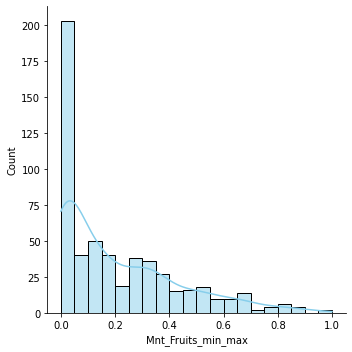

In [31]:
#we decided to normalize all the Mnt catagories to 0-1 scale using min-max normalization
scaler = MinMaxScaler()
scaler.fit(pd.DataFrame(data_frame['Mnt_Fruits']))
data_frame['Mnt_Fruits_min_max'] = scaler.transform(pd.DataFrame(data_frame['Mnt_Fruits']))
print(scaler.data_min_)
print(scaler.data_max_)
data_frame[['Mnt_Fruits','Mnt_Fruits_min_max']].head()
sns.displot(data_frame['Mnt_Fruits_min_max'], bins=20, kde=True, color='skyblue')
print (data_frame[["Mnt_Fruits_min_max"]].describe())

[0.]
[199.]
       Mnt_Meat_min_max
count        554.000000
mean           0.148586
std            0.214771
min            0.000000
25%            0.010050
50%            0.050251
75%            0.185930
max            1.000000


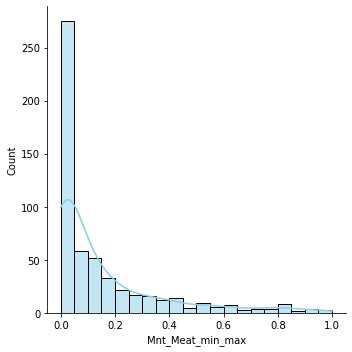

In [32]:
scaler = MinMaxScaler()
scaler.fit(pd.DataFrame(data_frame['Mnt_Meat']))
data_frame['Mnt_Meat_min_max'] = scaler.transform(pd.DataFrame(data_frame['Mnt_Meat']))
print(scaler.data_min_)
print(scaler.data_max_)
data_frame[['Mnt_Meat','Mnt_Meat_min_max']].head()
sns.displot(data_frame['Mnt_Meat_min_max'], bins=20, kde=True, color='skyblue')
print (data_frame[["Mnt_Meat_min_max"]].describe())

[0.]
[1607.]
       Mnt_sweet_min_max
count         554.000000
mean            0.103989
std             0.137109
min             0.000000
25%             0.009956
50%             0.045737
75%             0.150436
max             1.000000


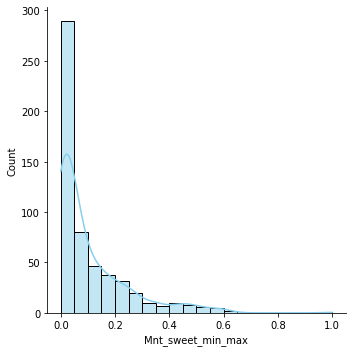

In [33]:
scaler = MinMaxScaler()
scaler.fit(pd.DataFrame(data_frame['Mnt_sweet']))
data_frame['Mnt_sweet_min_max'] = scaler.transform(pd.DataFrame(data_frame['Mnt_sweet']))
print(scaler.data_min_)
print(scaler.data_max_)
data_frame[['Mnt_sweet','Mnt_sweet_min_max']].head()
sns.displot(data_frame['Mnt_sweet_min_max'], bins=20, kde=True, color='skyblue')
print (data_frame[["Mnt_sweet_min_max"]].describe())

[0.]
[250.]
       Mnt_Wines_min_max
count         554.000000
mean            0.167632
std             0.236169
min             0.000000
25%             0.012000
50%             0.052000
75%             0.229000
max             1.000000


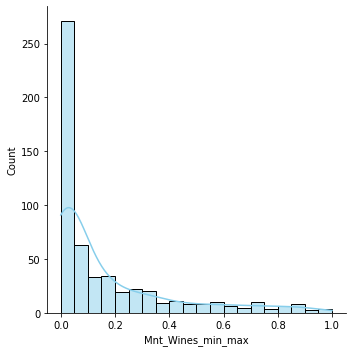

In [35]:
scaler = MinMaxScaler()
scaler.fit(pd.DataFrame(data_frame['Mnt_Wines']))
data_frame['Mnt_Wines_min_max'] = scaler.transform(pd.DataFrame(data_frame['Mnt_Wines']))
print(scaler.data_min_)
print(scaler.data_max_)
data_frame[['Mnt_Wines','Mnt_Wines_min_max']].head()
sns.displot(data_frame['Mnt_Wines_min_max'], bins=20, kde=True, color='skyblue')
print (data_frame[["Mnt_Wines_min_max"]].describe())

[0.]
[194.]
       Mnt_Gold_Products_min_max
count                 554.000000
mean                    0.152629
std                     0.219035
min                     0.000000
25%                     0.010309
50%                     0.051546
75%                     0.195876
max                     1.000000


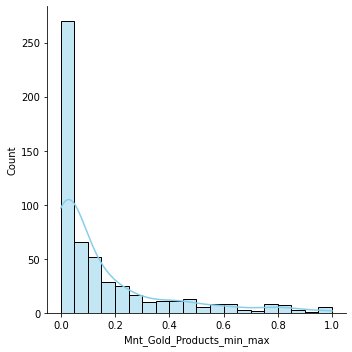

In [36]:
scaler = MinMaxScaler()
scaler.fit(pd.DataFrame(data_frame['Mnt_Gold_Products']))
data_frame['Mnt_Gold_Products_min_max'] = scaler.transform(pd.DataFrame(data_frame['Mnt_Gold_Products']))
print(scaler.data_min_)
print(scaler.data_max_)
data_frame[['Mnt_Gold_Products','Mnt_Gold_Products_min_max']].head()
sns.displot(data_frame['Mnt_Gold_Products_min_max'], bins=20, kde=True, color='skyblue')
print (data_frame[["Mnt_Gold_Products_min_max"]].describe())

[0.]
[247.]
       Mnt_Fish_min_max
count        554.000000
mean           0.183516
std            0.205635
min            0.000000
25%            0.040486
50%            0.109312
75%            0.234818
max            1.000000


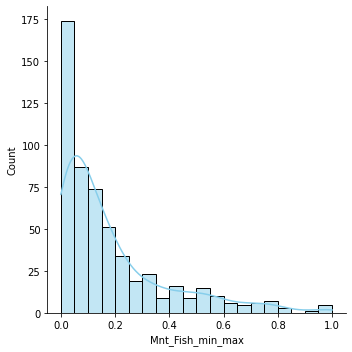

In [37]:
scaler = MinMaxScaler()
scaler.fit(pd.DataFrame(data_frame['Mnt_Fish']))
data_frame['Mnt_Fish_min_max'] = scaler.transform(pd.DataFrame(data_frame['Mnt_Fish']))
print(scaler.data_min_)
print(scaler.data_max_)
data_frame[['Mnt_Fish','Mnt_Fish_min_max']].head()
sns.displot(data_frame['Mnt_Fish_min_max'], bins=20, kde=True, color='skyblue')
print (data_frame[["Mnt_Fish_min_max"]].describe())

### Num_of_teen

In [38]:
data_frame['Num_of_Teen'].fillna(0,inplace=True)

### Response_campain_X

In [39]:
data_frame['Response_Campaign_1'].fillna(0,inplace=True)           

### Response_campain merge to 1

In [40]:
# Merging the Response_Campain_X into Responded
data_frame['Responded_old_campains'] = 0
for i in ['1','2','3','4','5']:
    data_frame.loc[data_frame['Response_Campaign_'+ i] == 1  , 'Responded'] = 1
data_frame['Responded'].value_counts()

1.0    114
Name: Responded, dtype: int64

In [41]:
data_frame.to_csv('Data_Test_V3.csv')